<a href="https://colab.research.google.com/github/samarasimhareddymatla-sys/air-pollution-prediction/blob/main/Air_Quality_Prediction_%26_Pollution_Hotspot_Detection__week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

**Load Dataset**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv("/content/hyderabad_air_quality_latest (3).csv")
df
print("Dataset Loaded Successfully")
print("Initial Shape:", df.shape)
print("\nAvailable columns in dataset:", df.columns.tolist())
print(df.head())
if "value" in df.columns:
    df.rename(columns={"value": "PM2.5"}, inplace=True)
    print("\nRenamed 'value' → 'PM2.5'")
else:
    print("\nColumn 'value' not found! Please check your dataset.")


Saving hyderabad_air_quality_latest (3).csv to hyderabad_air_quality_latest (3) (1).csv
Dataset Loaded Successfully
Initial Shape: (81, 13)

Available columns in dataset: ['city', 'station_name', 'station_id', 'sensor_id', 'sensor_name', 'parameter', 'value', 'units', 'datetime_utc', 'datetime_local', 'latitude', 'longitude', 'timezone']
  city                                 station_name  station_id  sensor_id  \
0  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235395   
1  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235396   
2  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235397   
3  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235398   
4  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235399   

  sensor_name parameter  value  units          datetime_utc  \
0      co ppb        co   0.48    ppb  2025-09-13T02:15:00Z   
1      no ppb        no  10.40    ppb  2025-09-13T02:15:00Z   
2 

**Data Cleaning**

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(df.mean(numeric_only=True))
print("Shape after cleaning:", df.shape)
print("\nMissing values after filling:\n", df.isnull().sum())

Shape after cleaning: (81, 13)

Missing values after filling:
 city              80
station_name       0
station_id         0
sensor_id          0
sensor_name       17
parameter         17
PM2.5              0
units             17
datetime_utc       0
datetime_local     0
latitude           0
longitude          0
timezone           0
dtype: int64


**Distribution of PM2.5**

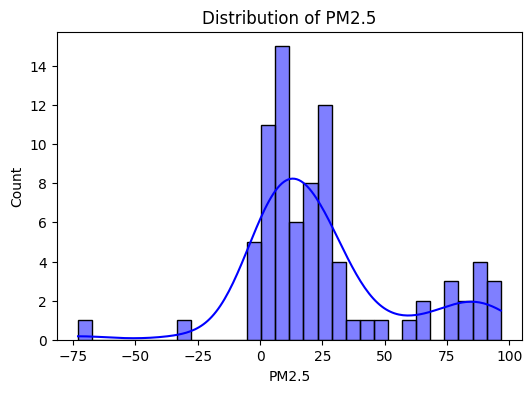

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['PM2.5'], bins=30, kde=True, color="blue")
plt.title("Distribution of PM2.5")
plt.show()

**Time-series plot**

In [ ]:
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.sort_values("date")
    plt.figure(figsize=(10,4))
    plt.plot(df["date"], df["PM2.5"], color="red")
    plt.title("PM2.5 Over Time")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.show()

**Hotspot Detection**

In [ ]:
if "location" in df.columns:
    location_mean = df.groupby("location")["PM2.5"].mean().sort_values(ascending=False)
    print("\nTop 5 Polluted Locations:\n", location_mean.head())
    plt.figure(figsize=(8,4))
    location_mean.head(5).plot(kind="bar", color="orange")
    plt.title("Top 5 Polluted Locations (Hotspots)")
    plt.ylabel("Average PM2.5")
    plt.show()

**Correlation Heatmap**

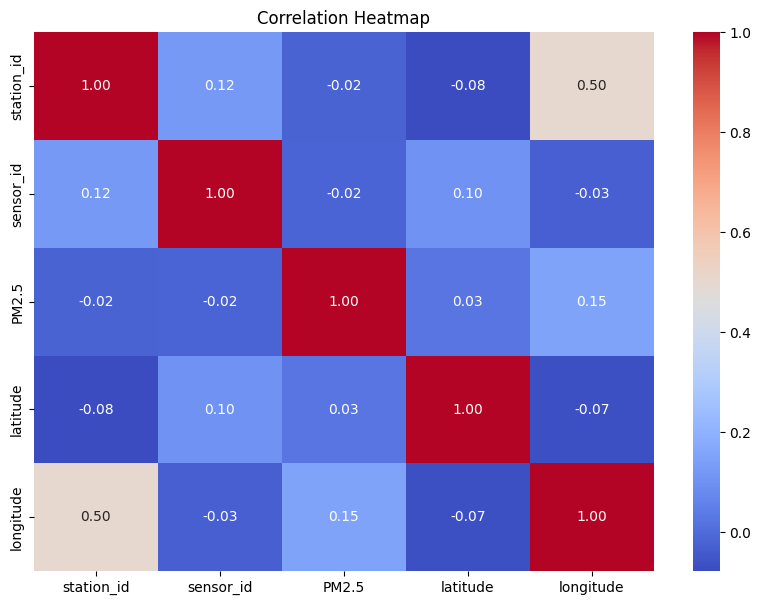

In [ ]:
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Train and Test**

In [ ]:
if "PM2.5" in df.columns:
    X = df.drop("PM2.5", axis=1)
    X = X.select_dtypes(include=[np.number])
    y = df["PM2.5"]
    print("Feature matrix shape:", X.shape)
    print("Target vector shape:", y.shape)
else:
    raise ValueError("PM2.5 column not found in dataset")
if X.shape[0] > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
else:
    print("⚠️ Not enough data for train-test split. Using all data for training.")
    X_train, y_train = X, y
    X_test, y_test = X, y

Feature matrix shape: (81, 4)
Target vector shape: (81,)


**Train the model**

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))
results = pd.DataFrame({"Model": ["Linear Regression", "Random Forest"],"MSE": [mean_squared_error(y_test, y_pred_lin),mean_squared_error(y_test, y_pred_rf)],"R2 Score": [r2_score(y_test, y_pred_lin),r2_score(y_test, y_pred_rf)]})
print("\nModel Comparison:")
print(results)


Linear Regression Performance:
MSE: 788.9751432967622
R2 Score: -0.10571188245790508

Random Forest Performance:
MSE: 701.8000846876467
R2 Score: 0.016459898208456503

Model Comparison:
               Model         MSE  R2 Score
0  Linear Regression  788.975143 -0.105712
1      Random Forest  701.800085  0.016460


**Visualization Prediction**

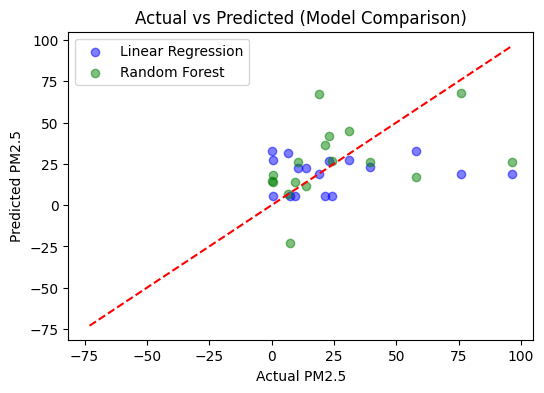

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.legend()
plt.title("Actual vs Predicted (Model Comparison)")
plt.show()

**Save the best model**

In [ ]:
joblib.dump(rf_model, "best_model.pkl")
print("\nRandom Forest model saved as best_model.pkl")
loaded_model = joblib.load("best_model.pkl")
sample_pred = loaded_model.predict(X_test.head(5))
print("\nSample Predictions from saved model:", sample_pred)


Random Forest model saved as best_model.pkl

Sample Predictions from saved model: [13.8175 17.979  16.8923 36.3595 14.7591]
